In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor   # 集成算法
from sklearn.model_selection import cross_val_score    # 交叉验证
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [11]:
df = pd.read_excel('merge_dataV2hubei.xlsx','Sheet1',index_col=None,header=0,skiprows=None)
df[0:5]
df1=df.iloc[:,2:]
df2=df1.dropna(axis=0, how='any', inplace=False)
df2
#print(df_confirm.shape)

,Medical,fever_clinics,20200223_cure,20200223_Death,20200223_cure_rate,20200223_death_rate
0,3,116,249,3,0.743284,0.008955
1,0,27,9,0,0.692308,0.000000
2,2,48,32,0,0.603774,0.000000
3,0,12,12,1,0.800000,0.066667
4,0,37,11,0,0.846154,0.000000
5,0,14,7,0,1.000000,0.000000
6,0,35,4,0,1.000000,0.000000
7,0,23,9,1,0.642857,0.071429
8,0,22,14,0,0.560000,0.000000
9,0,15,1,0,1.000000,0.000000


E:\ANACONDA\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\ANACONDA\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


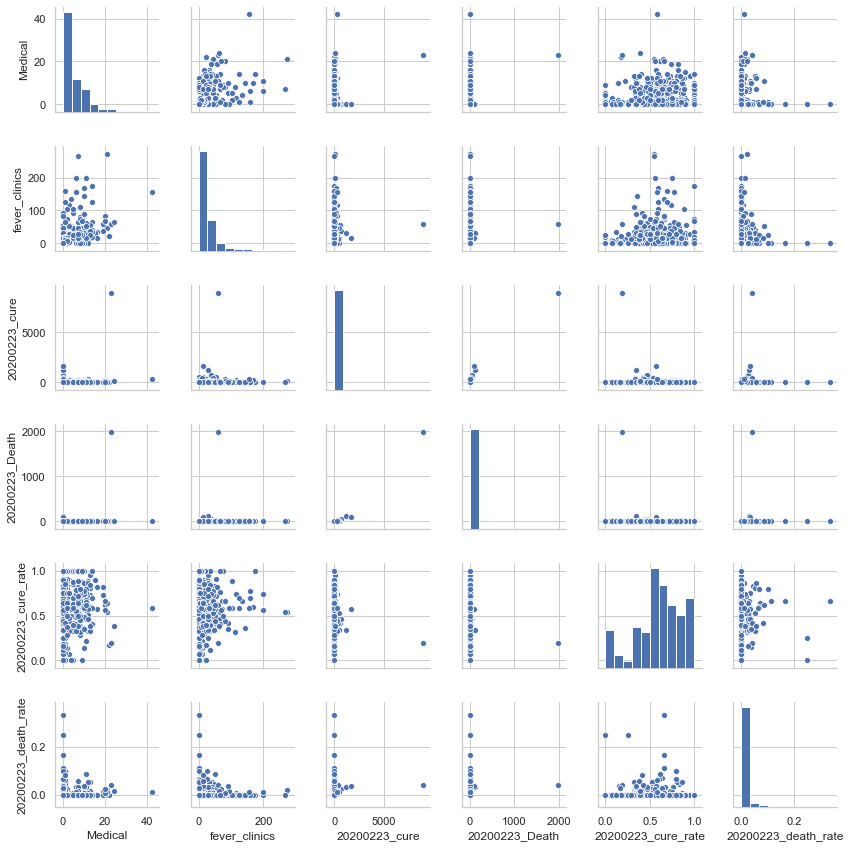

In [12]:
# 可视化数据关系
sns.set(style='whitegrid', context='notebook')   #style控制默认样式,context控制着默认的画幅大小
sns.pairplot(df, height=2)
plt.savefig('x.png')

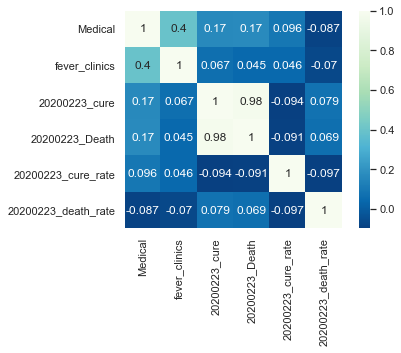

In [13]:
# 相关度
corr = df.corr()
# 相关度热力图
sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)
plt.savefig('xx.png')

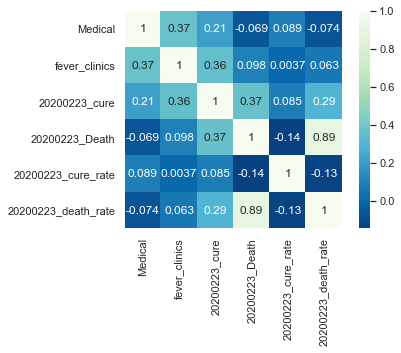

In [20]:
# 相关度
corr = df2.corr(method='kendall')
# 相关度热力图
sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)
plt.savefig('xx.png')

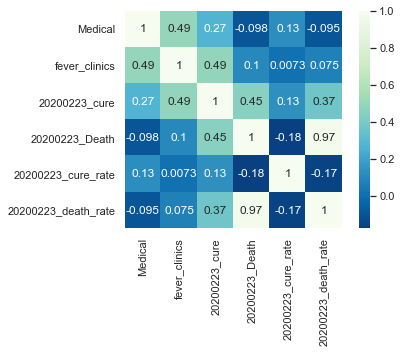

In [8]:
# 相关度
corr = df.corr(method='spearman')
# 相关度热力图
sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)
plt.savefig('xx.png')

In [ ]:
可见自变量'Medical'与'cure'与正相关

In [3]:
stats.pearsonr(df['fever_clinics'],df['20200223_cure_rate'])

(0.06273465382387126, 0.23706912650427403)

In [4]:
df.stats.pearsonr()

AttributeError: 'DataFrame' object has no attribute 'stats'

In [28]:
# 自变量
X = df[['fever_clinics']].values
# 因变量
y = df[df.columns[6]].values

# 设置交叉验证次数
n_folds = 3

# 建立贝叶斯岭回归模型
br_model = BayesianRidge()

# 普通线性回归
lr_model = LinearRegression()

# 弹性网络回归模型
etc_model = ElasticNet()

# 支持向量机回归
svr_model = SVR()

# 梯度增强回归模型对象
gbr_model = GradientBoostingRegressor()

# 不同模型的名称列表
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
# 不同回归模型
model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]
# 交叉验证结果
cv_score_list = []
# 各个回归模型预测的y值列表
pre_y_list = []

# 读出每个回归模型对象
for model in model_dic:
    # 将每个回归模型导入交叉检验
    scores = cross_val_score(model, X, y, cv=n_folds)
    # 将交叉检验结果存入结果列表
    cv_score_list.append(scores)
    # 将回归训练中得到的预测y存入列表
    pre_y_list.append(model.fit(X, y).predict(X))
### 模型效果指标评估 ###
# 获取样本量，特征数
n_sample, n_feature = X.shape
# 回归评估指标对象列表
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]
# 回归评估指标列表
model_metrics_list = []
# 循环每个模型的预测结果
for pre_y in pre_y_list:
    # 临时结果列表
    tmp_list = []
    # 循环每个指标对象
    for mdl in model_metrics_name:
        # 计算每个回归指标结果
        tmp_score = mdl(y, pre_y)
        # 将结果存入临时列表
        tmp_list.append(tmp_score)
    # 将结果存入回归评估列表
    model_metrics_list.append(tmp_list)
df_score = pd.DataFrame(cv_score_list, index=model_names)
df_met = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])

# 各个交叉验证的结果
df_score


E:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

,0,1,2
BayesianRidge,-0.092212,0.002524,-0.251003
LinearRegression,-0.092071,0.002811,-0.258610
ElasticNet,-0.093385,-0.000562,-0.223207
SVR,-0.438802,-0.420897,-1.209734
GBR,-0.436130,-0.288160,-1.066828


In [29]:
# 各种评估结果
df_met


,ev,mae,mse,r2
BayesianRidge,0.003921,0.213831,0.074159,0.003921
LinearRegression,0.003936,0.213898,0.074158,0.003936
ElasticNet,0.001457,0.213094,0.074342,0.001457
SVR,0.130047,0.192652,0.064769,0.130043
GBR,0.153271,0.192894,0.063040,0.153271


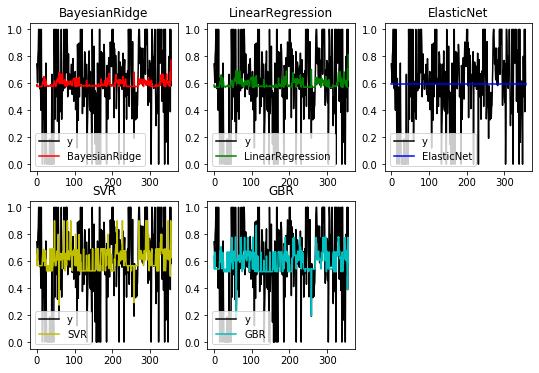

In [27]:
### 可视化 ###
# 创建画布
plt.figure(figsize=(9, 6))
# 颜色列表
color_list = ['r', 'g', 'b', 'y', 'c']
# 循环结果画图
for i, pre_y in enumerate(pre_y_list):
    # 子网络
    plt.subplot(2, 3, i+1)
    # 画出原始值的曲线
    plt.plot(np.arange(X.shape[0]), y, color='k', label='y')
    # 画出各个模型的预测线
    plt.plot(np.arange(X.shape[0]), pre_y, color_list[i], label=model_names[i])
    plt.title(model_names[i])
    plt.legend(loc='lower left')
plt.savefig('xxx.png')
plt.show()


In [32]:
# 自变量
X = df[['Medical']].values
# 因变量
y = df[df.columns[7]].values

# 设置交叉验证次数
n_folds = 5

# 建立贝叶斯岭回归模型
br_model = BayesianRidge()

# 普通线性回归
lr_model = LinearRegression()

# 弹性网络回归模型
etc_model = ElasticNet()

# 支持向量机回归
svr_model = SVR()

# 梯度增强回归模型对象
gbr_model = GradientBoostingRegressor()

# 不同模型的名称列表
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
# 不同回归模型
model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]
# 交叉验证结果
cv_score_list = []
# 各个回归模型预测的y值列表
pre_y_list = []

# 读出每个回归模型对象
for model in model_dic:
    # 将每个回归模型导入交叉检验
    scores = cross_val_score(model, X, y, cv=n_folds)
    # 将交叉检验结果存入结果列表
    cv_score_list.append(scores)
    # 将回归训练中得到的预测y存入列表
    pre_y_list.append(model.fit(X, y).predict(X))
### 模型效果指标评估 ###
# 获取样本量，特征数
n_sample, n_feature = X.shape
# 回归评估指标对象列表
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]
# 回归评估指标列表
model_metrics_list = []
# 循环每个模型的预测结果
for pre_y in pre_y_list:
    # 临时结果列表
    tmp_list = []
    # 循环每个指标对象
    for mdl in model_metrics_name:
        # 计算每个回归指标结果
        tmp_score = mdl(y, pre_y)
        # 将结果存入临时列表
        tmp_list.append(tmp_score)
    # 将结果存入回归评估列表
    model_metrics_list.append(tmp_list)
df_score = pd.DataFrame(cv_score_list, index=model_names)
df_met = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])

# 各个交叉验证的结果
df_score


E:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

,0,1,2,3,4
BayesianRidge,-0.190617,-1.409898,-0.007272,-0.057952,-0.074668
LinearRegression,-0.191787,-1.435704,-0.006980,-0.057674,-0.082732
ElasticNet,-0.204760,-1.016494,-0.016272,-0.066028,-0.015964
SVR,-45.151013,-139.863312,-3.881846,-3.109650,-21.776294
GBR,-0.386896,-1.148423,0.049395,0.039096,-0.187638


In [33]:
df_met


,ev,mae,mse,r2
BayesianRidge,0.006970,0.014709,0.000974,0.006970
LinearRegression,0.006980,0.014718,0.000974,0.006980
ElasticNet,0.000000,0.014538,0.000981,0.000000
SVR,0.000000,0.094494,0.009275,-8.455862
GBR,0.090672,0.012399,0.000892,0.090672


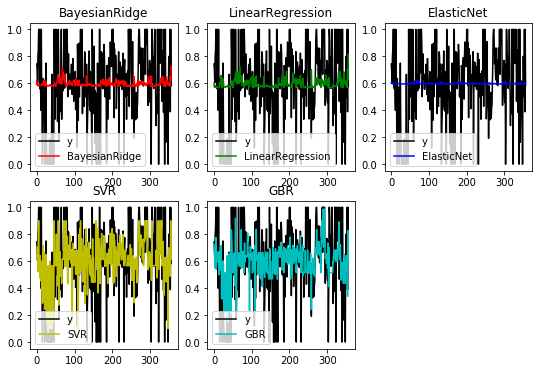

In [17]:
### 可视化 ###
# 创建画布
plt.figure(figsize=(9, 6))
# 颜色列表
color_list = ['r', 'g', 'b', 'y', 'c']
# 循环结果画图
for i, pre_y in enumerate(pre_y_list):
    # 子网络
    plt.subplot(2, 3, i+1)
    # 画出原始值的曲线
    plt.plot(np.arange(X.shape[0]), y, color='k', label='y')
    # 画出各个模型的预测线
    plt.plot(np.arange(X.shape[0]), pre_y, color_list[i], label=model_names[i])
    plt.title(model_names[i])
    plt.legend(loc='lower left')
plt.savefig('xxx.png')
plt.show()


In [19]:
df2.columns[2]

'20200223_cure'

In [25]:
df.columns[6]

'20200223_cure_rate'

In [28]:
df[df.columns[6]].values.nan_to_num(0)  

AttributeError: 'numpy.ndarray' object has no attribute 'nan_to_num'